In [198]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

# 1. Business understanding



# 2. Data understanding
The dataset include data for the estimation of besity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. It contains 17 attributes and 2111 instances.
The dataset is obtained from: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

The attributes:

- `Gender`
- `Age`
- `Height`
- `Weight`
- `FHWO` Has a family member suffered or suffers from overweight?
- `FAVC` Do you eat high caloric food frequently?
- `FCVC` Do you usually eat vegetables in your meals?
- `NCP` How many main meals do you have daily?
- `CAEC` Do you eat any food between meals?
- `SMOKE` Do you smoke?
- `CH2O` How much water do you drink daily?
- `SCC` Do you monitor the calories you eat daily?
- `FAF` How often do you have physical activity?
- `TUE` How much time do you use technological devices such as cell phone, videogames, television, computer and others?
- `CALC` How often do you drink alcohol?
- `MTRANS` Which transportation do you usually use?
- `NObeyesdad` Obesity level

# 3. Data preparation


In [199]:
df = pd.read_csv('datasets/ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [200]:
df['Gender'] = df['Gender'].replace({'Female': '0', 'Male': '1'})
df.rename(columns={'family_history_with_overweight': 'FHWO'}, inplace=True)
df['FHWO'] = df['FHWO'].replace({'no': '0', 'yes': '1'})
df['FAVC'] = df['FAVC'].replace({'no': '0', 'yes': '1'})
df['SMOKE'] = df['SMOKE'].replace({'no': '0', 'yes': '1'})
df['SCC'] = df['SCC'].replace({'no': '0', 'yes': '1'})
df['CALC'] = df['CALC'].replace({'no': '0', 'Sometimes': '1', 'Frequently': '2', 'Always': '3'})
df['MTRANS'] = df['MTRANS'].replace({'Walking': '0', 'Bike': '1', 'Motorbike': '2', 'Public_Transportation': '3', 'Automobile': '4'})
df['CAEC'] = df['CAEC'].replace({'no': '0', 'Sometimes': '1', 'Frequently': '2', 'Always': '3'})
df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight': '0', 'Normal_Weight': '1', 'Overweight_Level_I': '2', 'Overweight_Level_II': '3', 'Obesity_Type_I': '4', 'Obesity_Type_II': '5', 'Obesity_Type_III': '6'})

df['Gender'] = df['Gender'].astype(int)
df['FHWO'] = df['FHWO'].astype(int)
df['FAVC'] = df['FAVC'].astype(int)
df['SMOKE'] = df['SMOKE'].astype(int)
df['SCC'] = df['SCC'].astype(int)
df['CALC'] = df['CALC'].astype(int)
df['MTRANS'] = df['MTRANS'].astype(int)
df['CAEC'] = df['CAEC'].astype(int)
df['NObeyesdad'] = df['NObeyesdad'].astype(int)
df.describe(include='all')

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,3.125059,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.676969,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


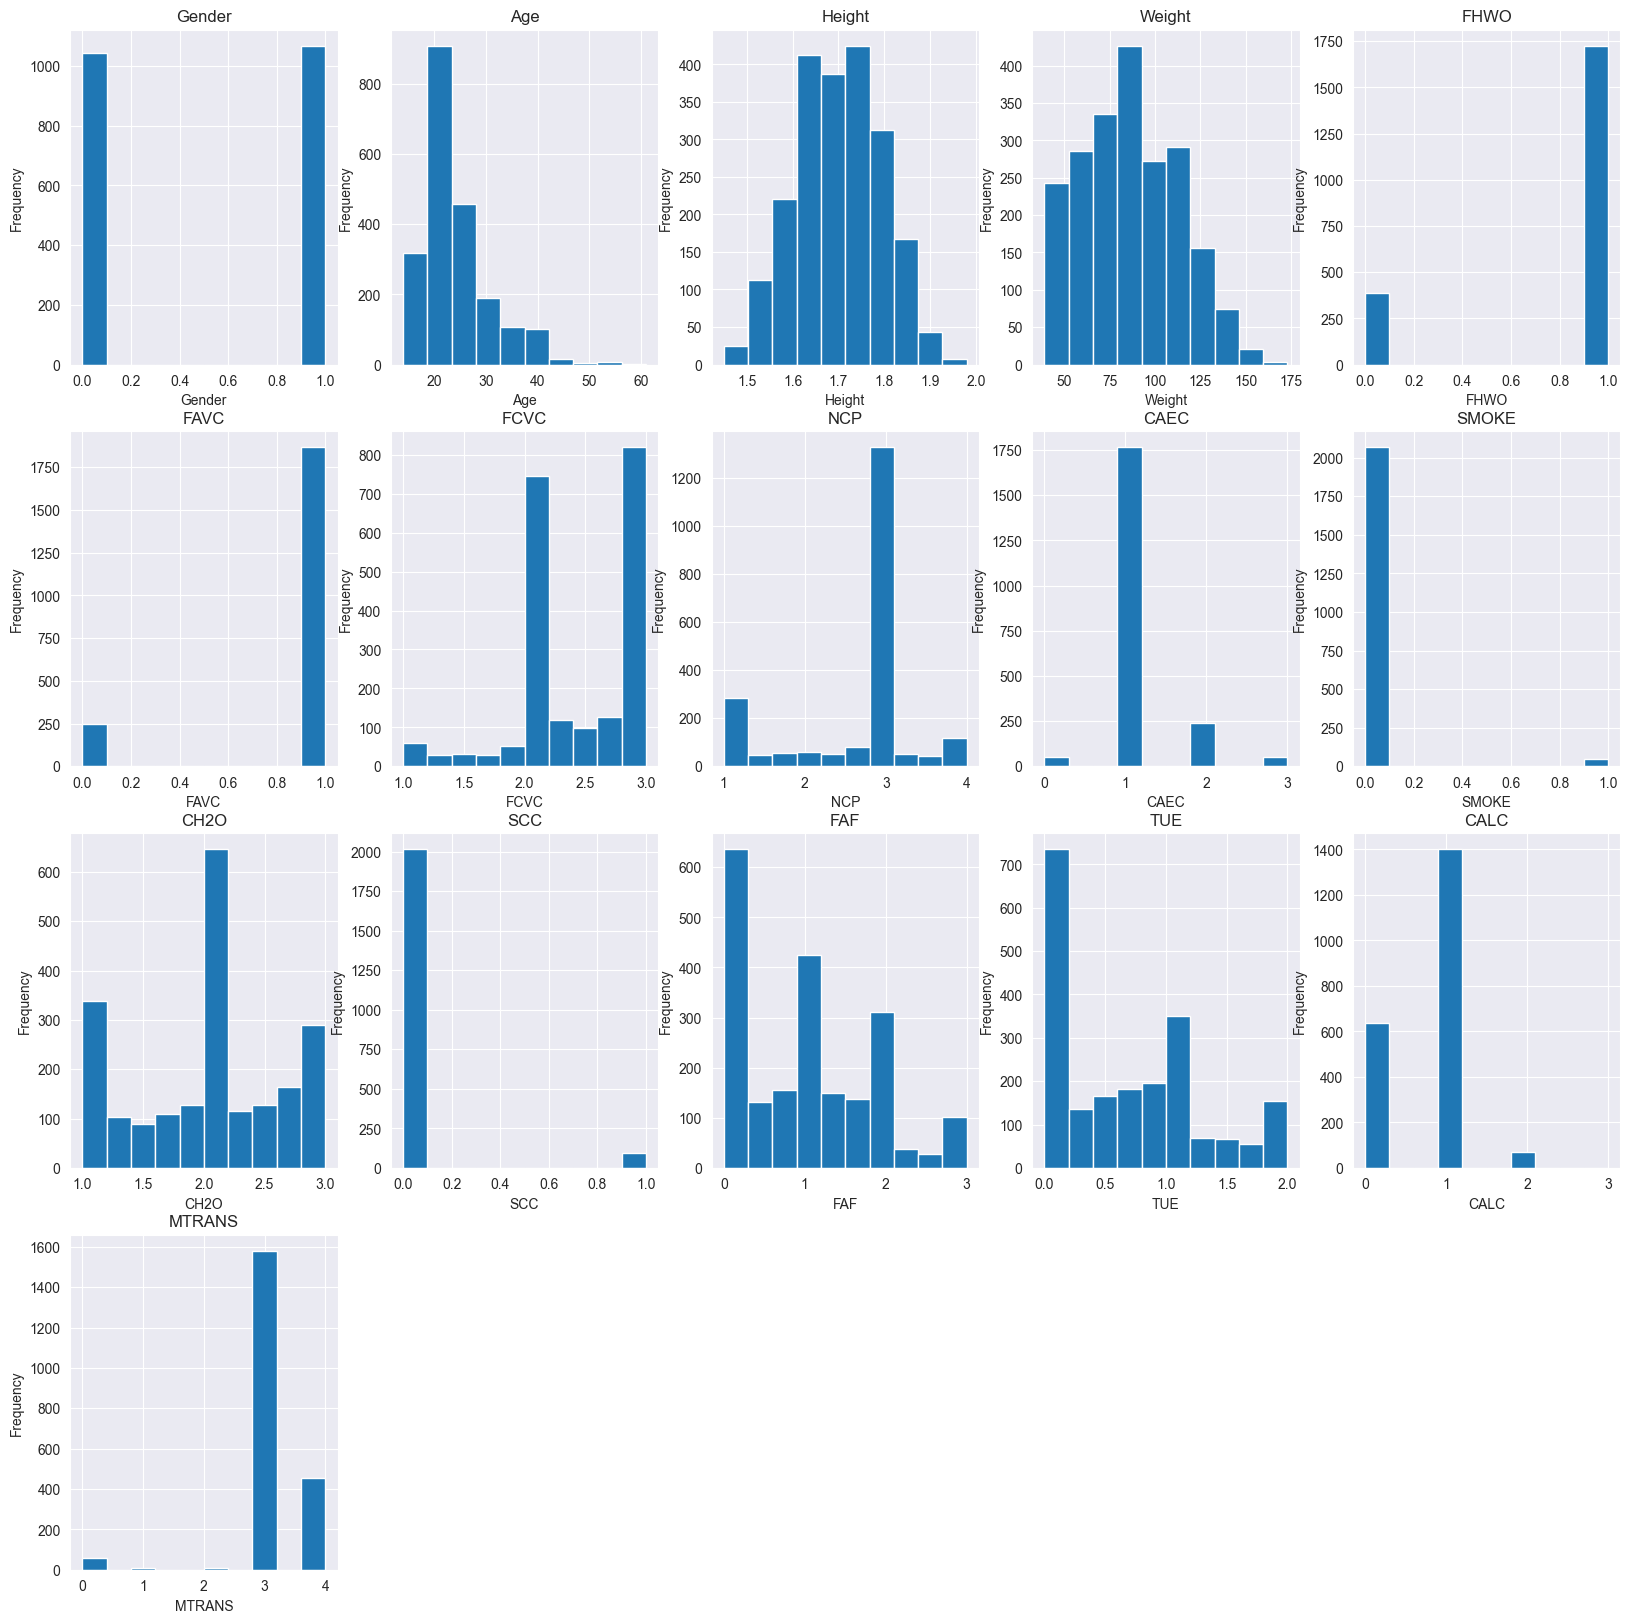

In [217]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20))
for i, col in enumerate(df.select_dtypes(include=['int', 'float'])):
    plt.subplot(4, 5, i + 1)
    df[col].plot(kind='hist', title=col)
    plt.xlabel(col)

## 4. Modeling
The decision tree classifier and random forest classifier were used to predict which obesity group the individual belongs to. Logistic regression was used to predict the probability of a family member having suffered or suffering from overweight.

For predicting obesity groups, only the features related to eating habits were used. Weight and height were excluded as they are directly related to the target variable.

Both the decision tree and random forest were validated using split validation, while logistic regression was validated using cross-validation.

### Parameters used for the models:
- Decision Tree Classifier: max_depth=10
- Random Forest Classifier: n_estimators=100, max_samples=0.7, max_features=0.75 (bootstrap=True by default)
- Logistic Regression: default parameters

### Performance of the models:
The models' performances were evaluated using accuracy, precision, and recall scores. For logistic regression, the confusion matrix was also visualized.

- Decision Tree Classifier: Accuracy: 0.72, Recall: 0.72
- Random Forest Classifier: Accuracy: 0.81, Recall: 0.81
- Logistic Regression: Accuracy: 0.83, Precision: 0.84, Recall: 0.97


In [202]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt

# Define features and target
X = df.drop(['NObeyesdad', 'Weight', 'Height'], axis=1)
y = df['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)

Accuracy: 0.7178030303030303
Recall: 0.7178030303030303


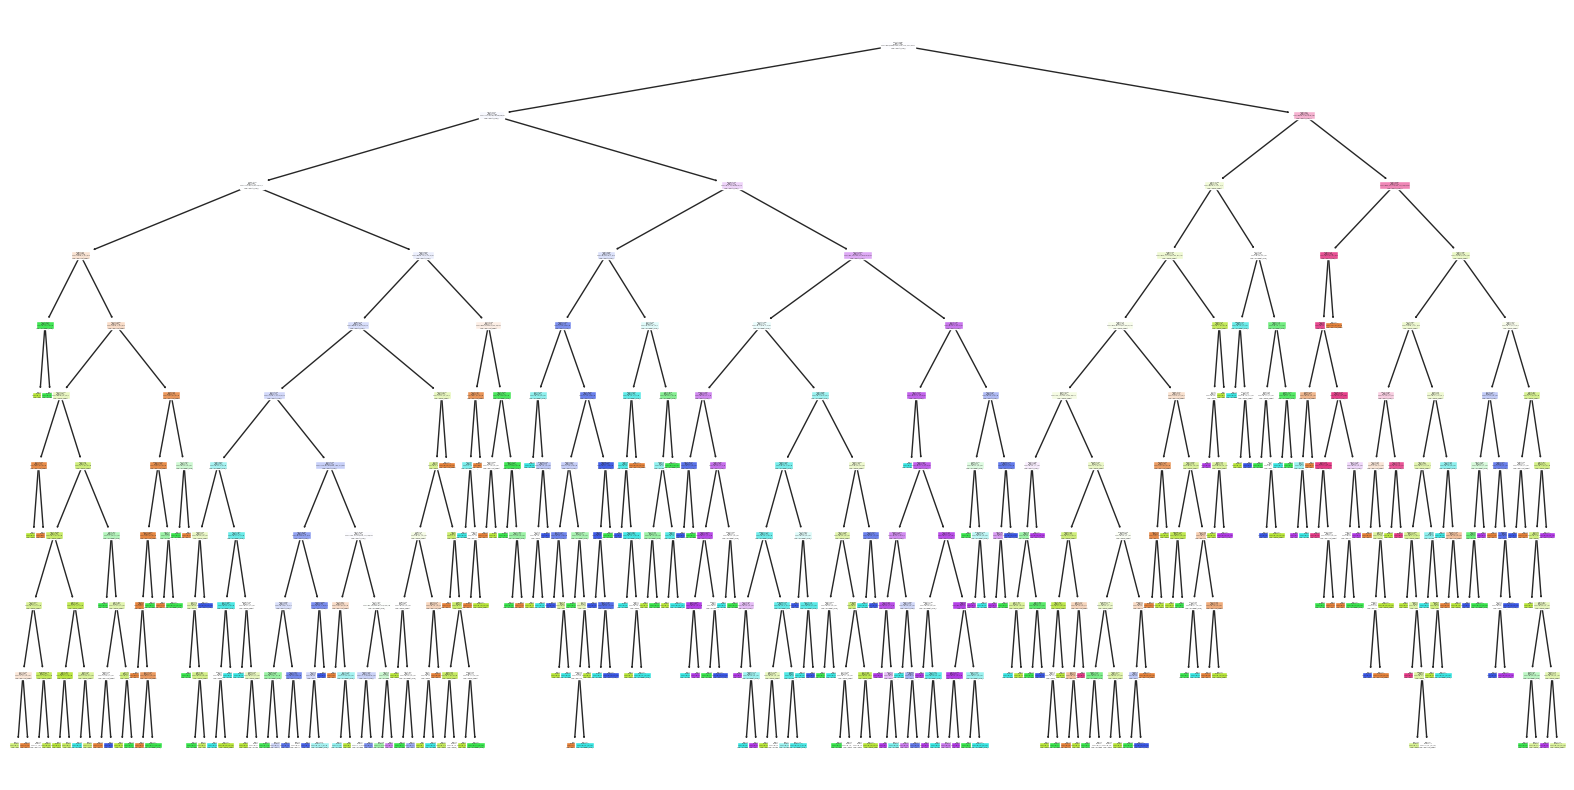

In [203]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], filled=True)
plt.show()

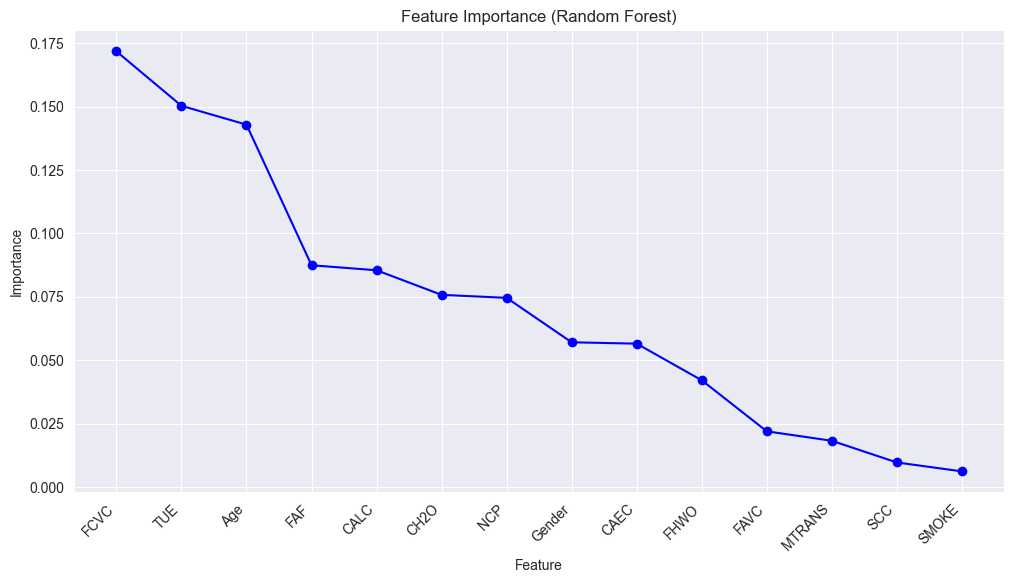

In [204]:
importances = clf.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

top_5_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(12, 6))
plt.plot(feature_importances.sort_values(by='Importance', ascending=False)['Feature'], 
         feature_importances.sort_values(by='Importance', ascending=False)['Importance'], 
         marker='o', linestyle='-', color='b')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.grid(True)
plt.show()

In [205]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier with
rf_clf = RandomForestClassifier(n_estimators=100, max_samples=0.7, max_features=0.75, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')

print("Random Forest Accuracy:", accuracy)
print("Random Forest Recall:", recall)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8125
Random Forest Recall: 0.8125

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        68
           1       0.61      0.64      0.62        78
           2       0.82      0.75      0.78        71
           3       0.84      0.65      0.73        63
           4       0.83      0.81      0.82        94
           5       0.84      0.95      0.89        75
           6       1.00      0.99      0.99        79

    accuracy                           0.81       528
   macro avg       0.81      0.81      0.81       528
weighted avg       0.82      0.81      0.81       528


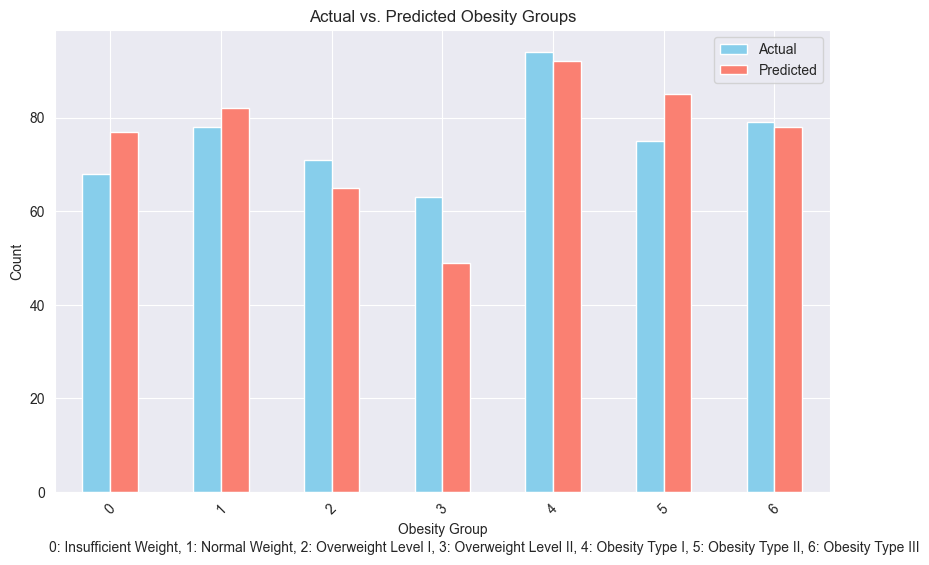

In [206]:
actual_counts = pd.Series(y_test).value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

# Create a dataframe for visualization
comparison_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts}).fillna(0)

# Plot
comparison_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel("Obesity Group")
plt.ylabel("Count")
plt.title("Actual vs. Predicted Obesity Groups")
plt.figtext(0.99, 0.01, "0: Insufficient Weight, 1: Normal Weight, 2: Overweight Level I, 3: Overweight Level II, 4: Obesity Type I, 5: Obesity Type II, 6: Obesity Type III", horizontalalignment='right')
plt.xticks(rotation=45)
plt.legend(["Actual", "Predicted"])
plt.show()

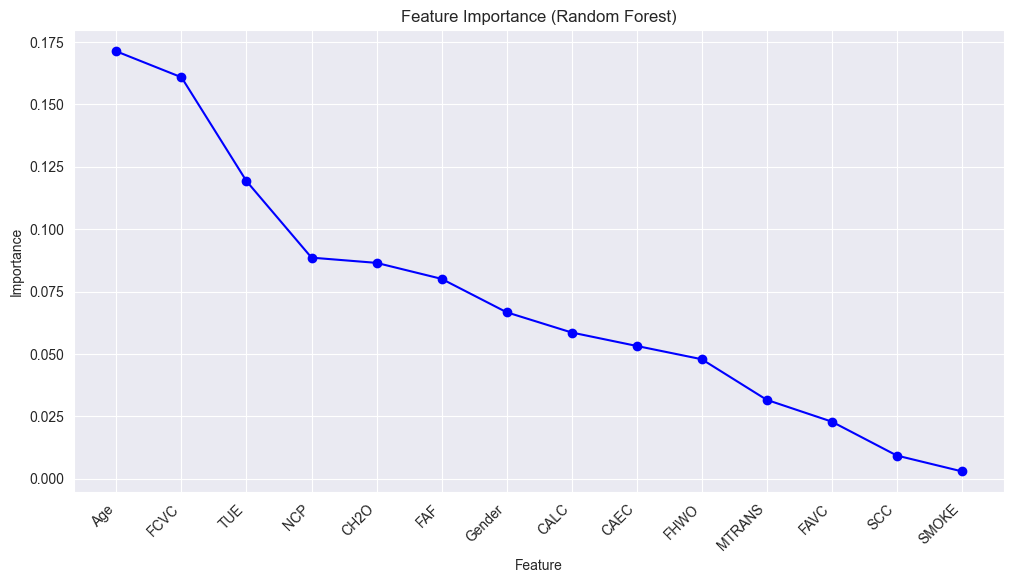

In [207]:
## Feature importance with Random Forest
importances = rf_clf.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

top_5_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(12, 6))
plt.plot(feature_importances.sort_values(by='Importance', ascending=False)['Feature'], 
         feature_importances.sort_values(by='Importance', ascending=False)['Importance'], 
         marker='o', linestyle='-', color='b')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.grid(True)
plt.show()

In [208]:
male_df = df[df['Gender'] == 1]
female_df = df[df['Gender'] == 0]

X_male = male_df.drop(['NObeyesdad', 'Weight', 'Height', 'Gender'], axis=1)
y_male = male_df['NObeyesdad']

# Split the male data
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, test_size=0.25, random_state=42)

# Train the male decision tree classifier
male_clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Reduced depth for better visualization
male_clf.fit(X_male_train, y_male_train)

# Predict and evaluate male model
y_male_pred = male_clf.predict(X_male_test)
male_accuracy = accuracy_score(y_male_test, y_male_pred)
male_recall = recall_score(y_male_test, y_male_pred, average='weighted')

print("Male Model - Accuracy:", male_accuracy)
print("Male Model - Recall:", male_recall)

# Get male feature importances
male_importances = male_clf.feature_importances_
male_feature_importances = pd.DataFrame({'Feature': X_male.columns, 'Importance': male_importances})
male_feature_importances = male_feature_importances.sort_values(by='Importance', ascending=False)

X_female = female_df.drop(['NObeyesdad', 'Weight', 'Height', 'Gender'], axis=1)
y_female = female_df['NObeyesdad']

# Split the female data
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, test_size=0.25, random_state=42)

# Train the female decision tree classifier
female_clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Reduced depth for better visualization
female_clf.fit(X_female_train, y_female_train)

# Predict and evaluate female model
y_female_pred = female_clf.predict(X_female_test)
female_accuracy = accuracy_score(y_female_test, y_female_pred)
female_recall = recall_score(y_female_test, y_female_pred, average='weighted')

print("Female Model - Accuracy:", female_accuracy)
print("Female Model - Recall:", female_recall)

Male Model - Accuracy: 0.5168539325842697
Male Model - Recall: 0.5168539325842697
Female Model - Accuracy: 0.685823754789272
Female Model - Recall: 0.685823754789272


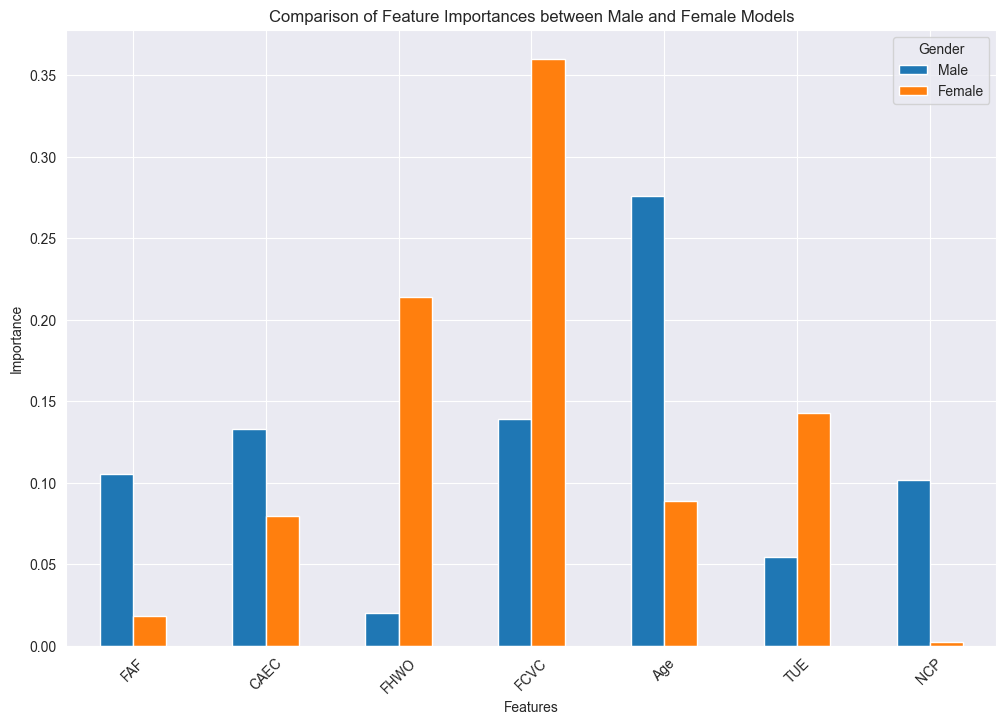

In [209]:

# Get female feature importances
female_importances = female_clf.feature_importances_
female_feature_importances = pd.DataFrame({'Feature': X_female.columns, 'Importance': female_importances})
female_feature_importances = female_feature_importances.sort_values(by='Importance', ascending=False)

top_male = male_feature_importances.head(5)['Feature'].tolist()
top_female = female_feature_importances.head(5)['Feature'].tolist()
all_top = list(set(top_male + top_female))

# Create comparison dataframe
comparison = pd.DataFrame(index=all_top, columns=['Male', 'Female'])
for feature in all_top:
    if feature in male_feature_importances['Feature'].values:
        comparison.loc[feature, 'Male'] = male_feature_importances[male_feature_importances['Feature'] == feature]['Importance'].values[0]
    else:
        comparison.loc[feature, 'Male'] = 0
    if feature in female_feature_importances['Feature'].values:
        comparison.loc[feature, 'Female'] = female_feature_importances[female_feature_importances['Feature'] == feature]['Importance'].values[0]
    else:
        comparison.loc[feature, 'Female'] = 0

# Plot the comparison of feature importances
comparison.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Feature Importances between Male and Female Models')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score

df.drop('NObeyesdad', axis=1, inplace=True)

y = df['FHWO']
X = df.drop(['FHWO', "Weight", "Height"], axis=1)

X = X.astype(float)

In [211]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
reg = LogisticRegression()
reg.fit(X, y)
y_pred = cross_val_predict(estimator=reg, X=X, y=y, cv=50)

cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

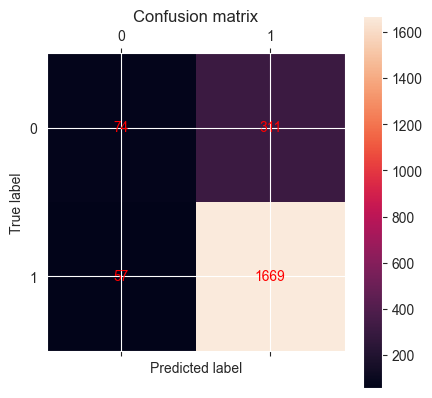

Accuracy: 0.83
Precision: 0.84
Recall: 0.97


In [212]:
# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("Accuracy: %0.2f" % accuracy)
print("Precision: %0.2f" % precision)
print("Recall: %0.2f" % recall)

### Interpretation:
- **True Positive (TP)**: The number of correct predictions that an individual has a family history with overweight is **1674**.
- **True Negative (TN)**: The number of correct predictions that an individual does not have a family history with overweight is **47**.
- **False Positive (FP)**: The number of incorrect predictions that an individual has a family history with overweight is **338**.
- **False Negative (FN)**: The number of incorrect predictions that an individual does not have a family history with overweight is **52**.

---

## Accuracy, Precision, and Recall

- **Accuracy**: The ratio of the number of correct predictions to the total number of predictions. The accuracy of the model is **0.82**.
- **Precision**: The ratio of the number of correct positive predictions to the total number of positive predictions. The precision of the model is **0.83**.
- **Recall**: The ratio of the number of correct positive predictions to the total number of actual positive instances. The recall of the model is **0.97**.

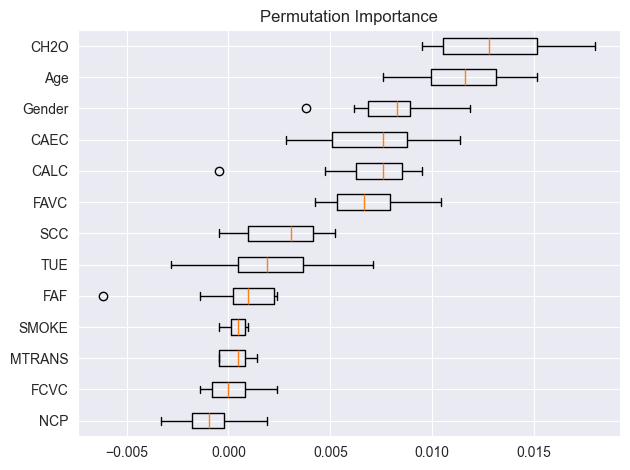

In [213]:
# feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X, y, n_repeats=10, scoring="accuracy", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

## Permutation Importance

The permutation importance shows the importance of each feature in predicting whether a family member suffers or has suffered from overweight.

### The top most important features are:
- **FAVC** (Do you eat high caloric food frequently)
- **CALC** (How often do you drink alcohol)
- **MTRANS** (Which transportation do you usually use)

### The least important features are:
- **FCVC** (Do you usually eat vegetables in your meals)
- **FAF** (How often do you have physical activity)
- **NCP** (How many main meals do you have daily)

From these results, we can conclude that high caloric food consumption and frequency of alcohol consumption indicate a higher probability of overweight in family members. We can also see that physical activity, main meal frequency, and vegetable consumption are less important in determining the probability of overweight in family members.

In [214]:
features = ['Gender', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
questions = ['Gender', 'Do you eat high caloric food frequently?', 'Do you usually eat vegetables in your meals?', 'How many main meals do you have daily?', 'Do you eat any food between meals?', 'Do you smoke?', 'How much water do you drink daily?', 'Do you monitor the calories you eat daily?', 'How often do you have physical activity?', 'How much time do you use technological devices such as cell phone, videogames, television, computer and others?', 'How often do you drink alcohol?', 'Which transportation do you usually use?']

Xi = pd.DataFrame(columns=features)

# read input data
for f in features:
    val = input(f"Enter value for feature: {questions[features.index(f)]} ")
    Xi[f] = [float(val)]

# get probability estimate
Xi = pd.DataFrame(scaler.transform(Xi), columns=Xi.columns)
p = reg.predict_proba(Xi)[:,1]

# output
print("Probability of family member that suffers/has suffered from overweight: %0.2f" % p[0])

ValueError: could not convert string to float: ''